In [108]:
import pandas as pd
import numpy as np                            #""Loading required libaries packages""
import seaborn as sns
file = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease') 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [109]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [110]:
print(abr)

         age                                       Age in years
0     Gender                       Gender ; Male - 1, Female -0
1         cp                                    Chest pain type
2   trestbps                             Resting blood pressure
3       chol                                cholesterol measure
4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5    restecg  ecg observation at resting condition,   -- Val...
6     thalch                        maximum heart rate achieved
7      exang                            exercise induced angina
8    oldpeak  ST depression induced by exercise relative to ...
9      slope          the slope of the peak exercise ST segment
10      thal                                               Thal
11       num  target [0=no heart disease; 1,2,3,4 = stages o...


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [112]:
df.describe().mean()

age         154.837485
trestbps    206.979028
chol        311.916566
thalch      218.095247
oldpeak     106.698141
num         114.644156
dtype: float64

# EDA

In [113]:
df.isnull().sum()    #missing values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [114]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [115]:
# Handling missing values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

print("Missing values after median imputation for 'oldpeak':")
print(df.isnull().sum())

Missing values after median imputation for 'oldpeak':
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


C:\Users\yaram\AppData\Local\Temp\ipykernel_5324\2651261931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


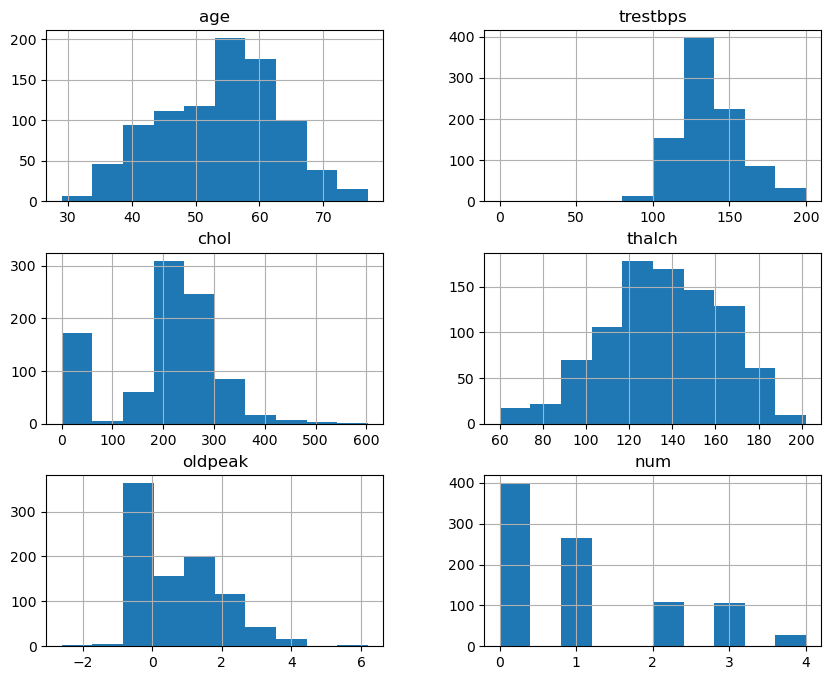

In [116]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

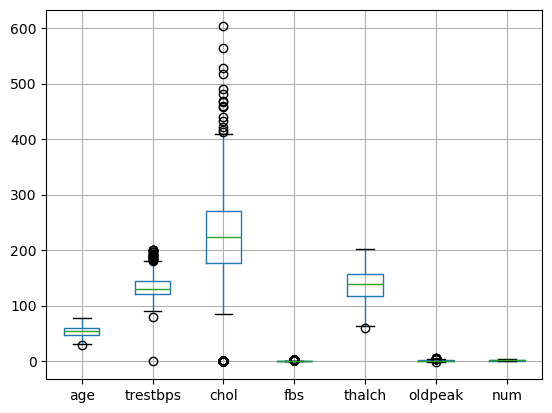

In [117]:
df.boxplot()
plt.show()

In [125]:
d1_cols=df.select_dtypes(include=['object']).columns.tolist()
d2_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()

d2_corr=df[d2_cols].corr()

print("Correlation matrix")
display(d2_corr)

Correlation matrix


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.310730
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.123417
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.237699
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.247466
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.334393
num,0.310730,0.123417,-0.237699,-0.247466,0.334393,1.000000


In [126]:

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Decision Tree Classification

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, roc_auc_score

In [132]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
df.isnull().any()

age                         False
trestbps                    False
chol                        False
fbs                         False
thalch                      False
oldpeak                     False
num                         False
sex_Male                    False
cp_atypical angina          False
cp_non-anginal              False
cp_typical angina           False
restecg_normal              False
restecg_st-t abnormality    False
exang_True                  False
exang_FALSE                 False
exang_TURE                  False
slope_flat                  False
slope_upsloping             False
thal_normal                 False
thal_reversable defect      False
dtype: bool

In [133]:
df['num']

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: int64

In [134]:

# Split the dataset into training and testing 
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7362637362637363
Precision: 0.7285233362036683
Recall: 0.7362637362637363
F1 Score: 0.7320277179738448
ROC-AUC: 0.6308191403081914


# Hyperparameter Tuning

In [135]:

from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}
# Create a DecisionTreeClassifier instance
dt_clf=DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Best Hyperparameters:')
print(best_params)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.7967032967032966
Precision: 0.8038138332255979
Recall: 0.7967032967032966
F1 Score: 0.7487806210590369
ROC-AUC: 0.6038118410381185


# Model evaluation analysis

In [136]:

import matplotlib.pyplot as plt

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

[[135   2]
 [ 35  10]]
age: 0.3229065202906543
trestbps: 0.022549948119592184
chol: 0.2716143343131625
fbs: 0.0
thalch: 0.041449441471742655
oldpeak: 0.25730609278429056
sex_Male: 0.08417366302055788
cp_atypical angina: 0.0
cp_non-anginal: 0.0
cp_typical angina: 0.0
restecg_normal: 0.0
restecg_st-t abnormality: 0.0
exang_True: 0.0
exang_FALSE: 0.0
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.0


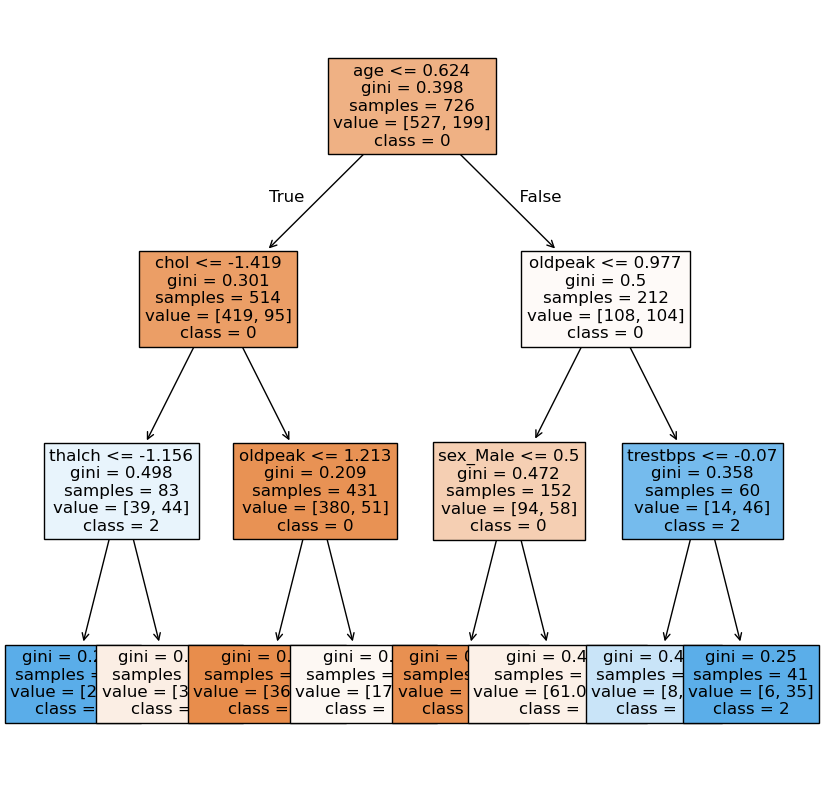

In [137]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['0', '2'], fontsize=12, filled=True)
plt.show()

In [138]:

# Evaluate the model performance using the obtained metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7967032967032966
Precision: 0.8038138332255979
Recall: 0.7967032967032966
F1 Score: 0.7487806210590369
ROC-AUC: 0.6038118410381185


# Interview Questions:

Decision Tree common hyperparameters 
1.Max_depth:Limits how deep the tree grows
2.min_samples_split: Minimum samples needed to split a node.
3.min_samples_leaf: Minimum samples required in a leaf node
4.max_features: Number of features checked at each split.
5.criterion (Gini/Entropy for classification, MSE for regression): How split quality is measured.
6.ccp_alpha / pruning: Removes weak branches.
*These hyperparameters mainly control tree complexity—more complexity can improve training accuracy but often increases overfitting,
 while limiting complexity improves generalization.

2.What is the difference between the Label encoding and One-hot encoding?

1.Label Encoding: 
Label encoding gives single numeric column (may add false order).
2.One-hot-encoding:
One-hot encoding gives multiple 0/1 columns (keeps categories separate, no order).